# **Agrupamento**

In [16]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
# padronização dos dados
from sklearn.preprocessing import StandardScaler

# **K-means**

# Base idade e salário

In [18]:
from sklearn.cluster import KMeans

In [19]:
x=[20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48] # idades  
y=[1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  # salarios

In [20]:
grafico = px.scatter(x = x, y = y)
grafico.show()

In [21]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                        [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                        [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [22]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [23]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [24]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [25]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

KMeans(n_clusters=3)

In [26]:
centroides = kmeans_salario.cluster_centers_
centroides

array([[ 0.07703438,  1.11413572],
       [ 0.73953003, -0.72661025],
       [-1.63312883, -0.77505093]])

In [27]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  41.16666667, 5600.        ],
       [  48.33333333, 1800.        ],
       [  22.66666667, 1700.        ]])

In [28]:
rotulos = kmeans_salario.labels_
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [29]:
grafico1 = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color=rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [12, 12, 12])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

# Dados randômicos

In [31]:
# geração de dados aleatórios
from sklearn.datasets import make_blobs

In [32]:
X_random, y_random = make_blobs(n_samples=200, centers=5, random_state=1)

In [33]:
X_random

array([[-1.96576392e+00,  5.23446451e+00],
       [-5.16022348e+00, -7.04217141e+00],
       [-6.17937069e+00, -2.16733539e+00],
       [-7.39138168e+00, -9.49590389e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-6.26144310e+00, -3.78347905e+00],
       [-2.04278768e+00,  3.07660864e-01],
       [-4.46426086e+00, -4.39451238e+00],
       [-6.40386190e+00, -6.36106990e+00],
       [ 2.42271161e-04,  5.14853403e+00],
       [-5.99212006e+00, -3.91488289e+00],
       [-6.46137477e+00, -3.14560994e+00],
       [-4.10185174e+00, -1.16625450e+00],
       [-1.01341572e+01, -4.07240274e+00],
       [-5.99004766e+00, -2.82631801e+00],
       [-1.14663009e+00,  4.10839703e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-9.19585147e+00, -3.90678125e+00],
       [-8.30173556e+00, -7.27738918e+00],
       [-7.56309575e+00, -8.46421308e+00],
       [-1.86845414e+00,  4.99311306e+00],
       [-4.22362233e+00, -2.50312346e+00],
       [-1.90838667e+00,  5.86113655e-01],
       [-6.

In [36]:
y_random

array([0, 2, 3, 2, 2, 3, 4, 3, 2, 0, 3, 3, 4, 1, 3, 0, 0, 1, 2, 2, 0, 3,
       4, 3, 4, 1, 2, 4, 4, 1, 2, 4, 0, 3, 2, 0, 1, 2, 1, 4, 2, 1, 4, 4,
       2, 4, 1, 3, 2, 0, 0, 3, 3, 0, 3, 1, 0, 4, 2, 2, 1, 3, 3, 3, 2, 0,
       0, 1, 4, 2, 1, 4, 2, 4, 4, 1, 2, 3, 0, 4, 1, 1, 3, 2, 3, 0, 2, 2,
       2, 1, 4, 3, 0, 4, 3, 1, 4, 0, 2, 1, 0, 2, 4, 1, 4, 2, 1, 2, 3, 0,
       3, 3, 2, 1, 3, 0, 1, 4, 0, 0, 2, 1, 1, 3, 0, 1, 2, 4, 2, 4, 0, 4,
       3, 3, 1, 1, 3, 0, 0, 3, 3, 3, 0, 0, 4, 2, 4, 0, 2, 3, 4, 3, 0, 4,
       3, 1, 1, 1, 0, 2, 4, 0, 1, 0, 4, 1, 1, 1, 3, 4, 1, 4, 4, 3, 0, 2,
       4, 3, 2, 0, 2, 0, 0, 2, 1, 4, 1, 0, 0, 3, 2, 4, 0, 1, 1, 4, 3, 4,
       2, 1])

In [37]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

In [38]:
kmeans_blobs = KMeans(n_clusters=5)
kmeans_blobs.fit(X_random)

KMeans(n_clusters=5)

In [39]:
rotulos = kmeans_blobs.predict(X_random)
rotulos

array([1, 0, 2, 0, 0, 2, 4, 2, 0, 1, 2, 2, 2, 3, 2, 1, 1, 3, 0, 0, 1, 2,
       4, 2, 4, 3, 0, 4, 4, 3, 0, 4, 1, 2, 0, 1, 3, 0, 3, 1, 3, 3, 4, 4,
       0, 4, 3, 2, 0, 4, 1, 2, 2, 1, 2, 3, 1, 2, 0, 0, 3, 2, 2, 2, 0, 4,
       1, 3, 4, 0, 3, 4, 0, 4, 4, 3, 0, 3, 1, 4, 3, 3, 2, 0, 2, 1, 0, 0,
       0, 3, 4, 2, 1, 4, 2, 3, 4, 1, 0, 3, 1, 0, 4, 3, 4, 0, 3, 0, 2, 1,
       2, 2, 0, 3, 2, 1, 3, 4, 1, 1, 0, 3, 3, 2, 1, 3, 0, 4, 0, 4, 1, 4,
       2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 1, 1, 4, 0, 4, 1, 0, 2, 4, 2, 1, 4,
       2, 3, 3, 3, 1, 0, 4, 1, 3, 1, 4, 3, 3, 3, 2, 4, 3, 4, 4, 2, 1, 0,
       4, 2, 0, 1, 0, 1, 1, 0, 3, 4, 3, 1, 1, 2, 0, 4, 1, 3, 3, 4, 2, 4,
       0, 3], dtype=int32)

In [40]:
centroides = kmeans_blobs.cluster_centers_
centroides

array([[-6.87958999, -8.11648104],
       [-1.58338528,  4.50520457],
       [-5.90368078, -3.04489641],
       [-9.85620522, -3.91021738],
       [-2.17069756,  1.02591979]])

In [41]:
grafico1 = px.scatter(x = X_random[:,0], y = X_random[:,1], color = rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [5, 5, 5, 5, 5])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

# **Base de dados cartão ed crédito - Ultilizando 1 atributo somente**
- Fonte:  https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [43]:
import pandas as pd
base_cartao = pd.read_csv('/content/credit_card_clients.csv', header = 1)
base_cartao

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [44]:
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']

In [45]:
base_cartao

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0         -1  ...          0          0         0       689         0   
1          0  ...       3455       3261         0      1000      1000   
2          0  ...      14948      15549      1518      1500      1000   
3          0  ...      28959      29547      2000      2019      1200   
4          0  ...      19146      19131      2000     36681     10000   
...      ...  ...        ...        ...       ...       ...       ...   
29995      0  ...      31237      15980      8500     20000      5003   
29996     -1  ...       5190          0      1837      3526      8998   
29997     -1  ...      20582      19357         0         0     22000   
29998      0  ...      11855      48944     85900      3409      1178   
29999      0  ...      32428      15313      2078      1800      1430   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  BILL_TOTAL  
0             0         0         0                           1        7704  
1          1000         0      2000                           1       17077  
2          1000      1000      5000                           0      101653  
3          1100      1069      1000                           0      231334  
4          9000       689       679                           0      109339  
...         ...       ...       ...                         ...         ...  
29995      3047      5000      1000                           0      725349  
29996       129         0         0                           0       21182  
29997      4200      2000      3100                           1       70496  
29998      1926     52964      1804                           1      266611  
29999      1000      1000      1000                           1      230874  

[30000 rows x 26 columns]

In [46]:
#Pegando duas colunas a 1 e a 25
X_cartao = base_cartao.iloc[:, [1, 25]].values
X_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [47]:
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)

In [48]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [49]:
wcss = []
for i in range(1, 11):
  #print(i)
  kmeans_cartao = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao.fit(X_cartao)
  wcss.append(kmeans_cartao.inertia_)

In [50]:
wcss

[59999.99999999978,
 35196.57080583435,
 20128.132558347686,
 14943.809173865899,
 10707.537016753624,
 8603.395384848965,
 7400.069599689482,
 6353.473303353463,
 5665.823857740179,
 5052.188166408734]

In [51]:
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

In [52]:
kmeans_cartao = KMeans(n_clusters=4, random_state=0)
rotulos = kmeans_cartao.fit_predict(X_cartao)

In [53]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color=rotulos)
grafico.show()

In [54]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [     2, 120000,      2, ...,      1,  17077,      0],
       [     3,  90000,      2, ...,      0, 101653,      0],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      0],
       [ 29999,  80000,      1, ...,      1, 266611,      0],
       [ 30000,  50000,      1, ...,      1, 230874,      0]])

In [55]:
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16789,  30000,      1, ...,      1,  14274,      0],
       [ 16788,  30000,      1, ...,      1,  90453,      0],
       ...,
       [ 20882, 110000,      1, ...,      0, 554308,      3],
       [ 20744, 220000,      1, ...,      0, 452961,      3],
       [ 20270, 150000,      2, ...,      0, 546939,      3]])

# **Base de dados cartão de crédito - mais atributos**

In [56]:
base_cartao.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_TOTAL'],
      dtype='object')

In [57]:
X_cartao_mais = base_cartao.iloc[:,[1,2,3,4,5,25]].values
X_cartao_mais

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]])

In [58]:
scaler_cartao_mais = StandardScaler()
X_cartao_mais = scaler_cartao.fit_transform(X_cartao_mais)

In [59]:
X_cartao_mais

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

In [60]:
wcss = []
for i in range(1, 11):
  kmeans_cartao_mais = KMeans(n_clusters = i, random_state = 0)
  kmeans_cartao_mais.fit(X_cartao_mais)
  wcss.append(kmeans_cartao_mais.inertia_)

In [61]:
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

In [82]:
kmeans_cartao_mais = KMeans(n_clusters=2, random_state=0)
rotulos = kmeans_cartao_mais.fit_predict(X_cartao_mais)

In [83]:
rotulos

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

In [84]:
# redução de dimensionalidade
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=2)
X_cartao_mais_pca = pca.fit_transform(X_cartao_mais)

In [86]:
X_cartao_mais_pca.shape

(30000, 2)

In [87]:
X_cartao_mais_pca

array([[-0.74082054, -1.13671858],
       [-1.48027121, -0.30100547],
       [-0.94737386, -0.48666789],
       ...,
       [-0.79468657, -0.90012663],
       [ 1.17562376, -1.54746987],
       [ 1.13614987, -1.14039836]])

In [88]:
grafico = px.scatter(x= X_cartao_mais_pca[:,0], y = X_cartao_mais_pca[:,1], color=rotulos)
grafico.show()

In [89]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16671,  20000,      1, ...,      0,  20753,      0],
       [ 16669,  60000,      1, ...,      0, 334495,      0],
       ...,
       [  6249, 390000,      1, ...,      0, 393330,      1],
       [ 17363,  50000,      2, ...,      0,  53295,      1],
       [ 15000,  50000,      1, ...,      0, 249711,      1]])

# **Agrupamento hierárquico**

# Base salário idade

In [90]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [91]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1])
grafico.show()

In [102]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

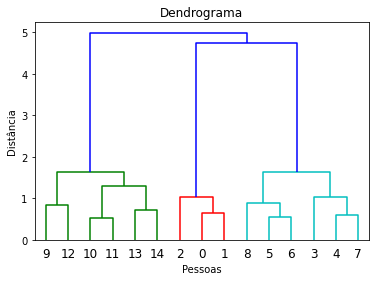

In [93]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância');

In [94]:
from sklearn.cluster import AgglomerativeClustering

In [95]:
hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
rotulos = hc_salario.fit_predict(base_salario)

In [96]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [97]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color = rotulos)
grafico.show()

# Base cartão de crédito

In [98]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

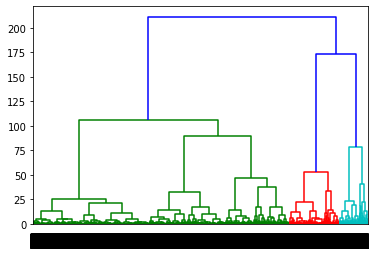

In [104]:
dendrograma = dendrogram(linkage(X_cartao, method = 'ward'))

In [105]:
hc_cartao = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
rotulos = hc_cartao.fit_predict(X_cartao)

In [106]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color = rotulos)
grafico.show()

# **DBSCAN**

# Base salário idade

In [108]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [109]:
from sklearn.cluster import DBSCAN

In [110]:
dbscan_salario = DBSCAN(eps = 0.95, min_samples=2)
dbscan_salario.fit(base_salario)

DBSCAN(eps=0.95, min_samples=2)

In [111]:
rotulos = dbscan_salario.labels_
rotulos

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [112]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color = rotulos)
grafico.show()

# Base cartão de crédito

In [113]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [114]:
dbscan_cartao = DBSCAN(eps=0.37, min_samples=5)
rotulos = dbscan_cartao.fit_predict(X_cartao)

In [115]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
np.unique(rotulos, return_counts=True)

(array([-1,  0,  1,  2]), array([   52, 29920,    18,    10]))

In [118]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color = rotulos)
grafico.show()

# **K-means x Hierárquico x DBSCAN**

In [119]:
from sklearn import datasets

In [120]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise = 0.09)

In [121]:
X_random

array([[ 0.2037529 ,  1.02049173],
       [-0.04679573,  0.89039154],
       [-0.71202661,  0.58007508],
       ...,
       [-1.10918219,  0.00206198],
       [-0.24030365,  1.01071892],
       [-0.62799525,  0.73268192]])

In [122]:
y_random

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
np.unique(y_random)

array([0, 1])

In [124]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

In [125]:
kmeans = KMeans(n_clusters=2)
rotulos = kmeans.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

In [126]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
rotulos = hc.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

In [127]:
dbscan = DBSCAN(eps=0.1)
rotulos = dbscan.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()